In [105]:
import astropy.units as u
import h5py
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import G

In [106]:
data['PartType1']['SubfindDensity'][:10]
h = data['Header'].attrs['HubbleParam']
m = data['Header'].attrs['MassTable'][1]  / h * u.solMass * 10**10
a = data['Header'].attrs['Time']


print(h)
print(m)
print(a)

0.6774
538464.1418081385 solMass
0.9999999999999998


In [107]:
coords = data['PartType1']['Coordinates'][:] / h


In [108]:
def pot_x(x, coords):    
    x_i = np.repeat(x, len(coords))
    return np.sum((- G*m /np.sqrt((x_i - coords)**2) / u.kpc).to(u.m**2 / u.s**2))

In [109]:
com_coord = np.sum(coords,axis=0) / len(coords)
coords_centred = coords - com_coord
com_dist = np.sqrt(np.sum(coords_centred**2, axis=1))

r_min = np.min(com_dist)
r_max = np.max(com_dist)

rs = np.linspace(0, r_max, 1000)
potentials = []
for r in rs:
    potentials.append(pot_x(r, com_dist) * u.s**2 / u.m**2)

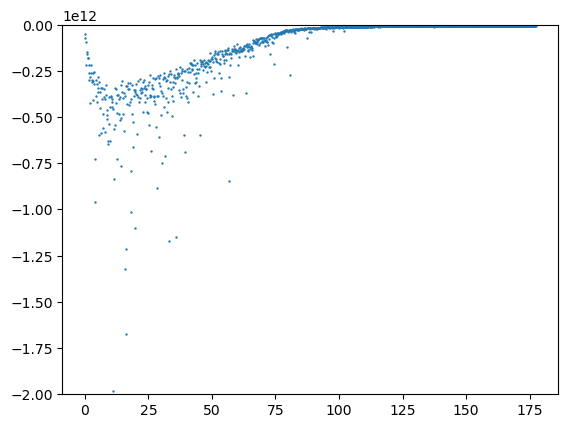

In [113]:
fig, ax = plt.subplots()
ax.scatter(rs, potentials, s = 0.5)
ax.set_ylim(-0.2*10**13, 0)
plt.show()